# Exercise 1

Compare AMGeO integrated Joule Heating to [Knipp et al. 2004 Joule Heating Proxy](https://doi.org/10.1007/s11207-005-6393-4)

This will require calling `nasaomnireader.omnireader.omni_interval` on a given interval of data from AMGeO.

NOTE: once you have an omni interval from `omni_interval`, you can get the joule heating index from property `knippjh` and the datetime from `Epoch`

In [1]:
# Ignore uunecessary warnings from AMGeO dependencies
import warnings
warnings.filterwarnings('ignore')

# python's datetime module
from datetime import datetime

# matplotlib tools
import matplotlib.pyplot as plt
import numpy as np

# cartopy
import cartopy.crs as crs

# apexpy
from apexpy import Apex



In [2]:
from AMGeO.api import AMGeOApi

api = AMGeOApi()
api

Solar wind data files will be saved to /home/jovyan/.local/share/nasaomnireader

------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



AMGeO API instance
current configuration: default
current output directory: /workspaces/Earthcube-Workshop-2022/amgeo_out

In [3]:
api.set_output_dir('./amgeo_out')

In [4]:
controller = api.get_controller()
controller

Default AMGeO Controller
Creates Assimilative Maps using SuperMAG and SuperDARN observations
Does not predict magnetic potential nor field-aligned current

In [5]:
controller.browse('N')

[datetime.date(2011, 9, 26),
 datetime.date(2015, 3, 17),
 datetime.date(2017, 9, 7),
 datetime.date(2017, 9, 8),
 datetime.date(2017, 9, 9)]

In [6]:
import datetime
ds = controller.load(datetime.date(2017,9,7),'N')
ds

<xarray.Dataset>
Dimensions:         (time: 288, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2017-09-07T00:02:30 ... 2017-09-07T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables: (12/13)
    E_ph            (time, lat, lon) float64 -0.01376 -0.01442 ... -0.0001178
    E_th            (time, lat, lon) float64 0.007904 0.005825 ... -7.189e-06
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 4.715e+03 5.192e+03 ... 1.129e+03
    int_joule_heat  (time) float64 13.63 15.22 19.02 16.76 ... 265.5 198.9 207.9
    ...              ...
    joule_heat      (time, lat, lon) float64 1.007 0.9673 ... 5.567e-05
    mpot            (time, lat, lon) float64 1.881 1.617 1.361 ... -1.55 -2.035
    sdB_ph          (time, lat, lon) float64 -28.92 -32.22 ... 2.262 3.546
    sdB_th          (time, lat, lon) float64 25.34 18.17 9.523 ... 3.866 3.898
    v_ph            (time, lat, lon) float64 134.5 99.11 ... 0.4663 -0.1472
    v_th            (time, lat, lon) float64 234.1 245.3 245.5 ... 0.2928 2.411
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

In [7]:
ds['sdB_ph'].attrs

{'description': 'sdB_ph',
 'longname': 'Spacecraft-Observed Magnetic Perturbations (eastward)',
 'shortname': 'sdB_ph',
 'units': 'nT'}

In [8]:
from nasaomnireader.omnireader import omni_interval
sdt = datetime.datetime(2017,9,7)
edt = datetime.datetime(2017,9,8)

oi = omni_interval(sdt,edt,'5min')


(105120,)
Created interval between 2017-09-07 and 2017-09-08, cadence 5min, start index 71712, end index 72000


In [9]:
t = oi['Epoch']
Bz = oi['BZ_GSM']
dst = oi['SYM_H']
kjh = oi['knippjh']

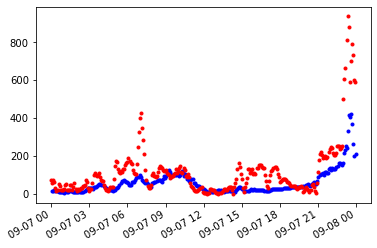

In [10]:
adt = ds['time']
ajh = ds['int_joule_heat']

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(adt,ajh,'b.',label='AMGeO')
ax.plot(t,kjh,'r.',label='Knipp et al. 2004')
f.autofmt_xdate()